In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('preprocessing data.csv', sep= ';')

In [3]:
data.head()

,nama,indo1,indo2,indo3,indo4,indo5,mtk1,mtk2,mtk3,mtk4,...,bio2,bio3,bio4,bio5,kim1,kim2,kim3,kim4,kim5,lulus
0,Muhammad Nuh Ihsan,98,98,98,98,96,98,98,98,98,...,98,98,98,98,98,98,100,100,100,1
1,Muhammad Raihan Ginanjar,98,98,98,98,96,98,98,98,98,...,98,100,100,100,98,98,98,98,95,1
2,Iffatul Faizah,98,98,98,98,96,98,98,98,98,...,98,98,98,98,98,98,98,98,97,1
3,Agitsna Renantera Misbah,98,98,98,98,96,98,98,98,98,...,98,98,98,98,98,98,98,98,97,1
4,Aisyah Safira Mulia,95,95,96,94,96,95,95,96,96,...,89,95,94,94,92,92,93,95,97,1


In [4]:
data.shape

(512, 32)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nama    512 non-null    object
 1   indo1   512 non-null    int64 
 2   indo2   512 non-null    int64 
 3   indo3   512 non-null    int64 
 4   indo4   512 non-null    int64 
 5   indo5   512 non-null    int64 
 6   mtk1    512 non-null    int64 
 7   mtk2    512 non-null    int64 
 8   mtk3    512 non-null    int64 
 9   mtk4    512 non-null    int64 
 10  mtk5    512 non-null    int64 
 11  ing1    512 non-null    int64 
 12  ing2    512 non-null    int64 
 13  ing3    512 non-null    int64 
 14  ing4    512 non-null    int64 
 15  ing5    512 non-null    int64 
 16  fis1    512 non-null    int64 
 17  fis2    512 non-null    int64 
 18  fis3    512 non-null    int64 
 19  fis4    512 non-null    int64 
 20  fis5    512 non-null    int64 
 21  bio1    512 non-null    int64 
 22  bio2    512 non-null    in

In [6]:
data.isna().sum()

nama     0
indo1    0
indo2    0
indo3    0
indo4    0
indo5    0
mtk1     0
mtk2     0
mtk3     0
mtk4     0
mtk5     0
ing1     0
ing2     0
ing3     0
ing4     0
ing5     0
fis1     0
fis2     0
fis3     0
fis4     0
fis5     0
bio1     0
bio2     0
bio3     0
bio4     0
bio5     0
kim1     0
kim2     0
kim3     0
kim4     0
kim5     0
lulus    0
dtype: int64

In [7]:
data.describe()

,indo1,indo2,indo3,indo4,indo5,mtk1,mtk2,mtk3,mtk4,mtk5,...,bio2,bio3,bio4,bio5,kim1,kim2,kim3,kim4,kim5,lulus
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.00000,512.000000,512.000000,512.000000,...,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,91.220703,91.757812,91.921875,92.820312,92.484375,88.894531,89.18750,91.066406,90.185547,90.677734,...,87.593750,88.853516,89.001953,89.601562,87.199219,88.175781,89.271484,89.564453,89.310547,0.699219
std,8.488517,6.731933,4.620400,4.699475,4.158756,8.811830,7.22195,6.402932,6.660832,6.639122,...,6.865139,5.893712,5.720324,6.513680,8.957573,7.253338,6.011285,6.106022,6.394962,0.459046
min,4.000000,4.000000,75.000000,75.000000,72.000000,5.000000,20.00000,75.000000,75.000000,70.000000,...,3.000000,75.000000,75.000000,74.000000,3.000000,3.000000,75.000000,75.000000,75.000000,0.000000
25%,90.000000,90.000000,90.000000,91.000000,90.000000,84.750000,85.00000,88.000000,86.000000,87.000000,...,84.000000,85.000000,85.000000,85.000000,83.000000,84.000000,86.000000,86.000000,85.000000,0.000000
50%,93.000000,94.000000,93.000000,94.000000,93.000000,91.000000,90.00000,93.000000,92.000000,92.000000,...,89.000000,89.000000,90.000000,91.000000,88.000000,89.000000,90.000000,90.000000,91.000000,1.000000
75%,95.000000,95.000000,95.000000,96.000000,96.000000,95.000000,95.00000,96.000000,96.000000,96.000000,...,92.000000,93.250000,93.000000,95.000000,92.000000,93.000000,94.000000,94.000000,94.000000,1.000000
max,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,99.000000,...,98.000000,100.000000,100.000000,100.000000,98.000000,98.000000,100.000000,100.000000,100.000000,1.000000


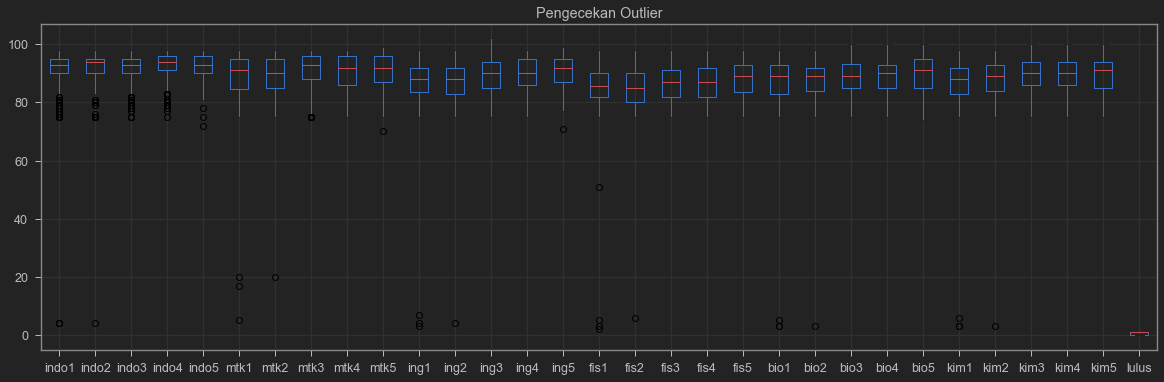

In [8]:
plt.figure(figsize=(20,6))
data.boxplot()
plt.title('Pengecekan Outlier')
plt.show()

In [9]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [10]:
data.columns

Index(['nama', 'indo1', 'indo2', 'indo3', 'indo4', 'indo5', 'mtk1', 'mtk2',
       'mtk3', 'mtk4', 'mtk5', 'ing1', 'ing2', 'ing3', 'ing4', 'ing5', 'fis1',
       'fis2', 'fis3', 'fis4', 'fis5', 'bio1', 'bio2', 'bio3', 'bio4', 'bio5',
       'kim1', 'kim2', 'kim3', 'kim4', 'kim5', 'lulus'],
      dtype='object')

In [11]:
for i in data.iloc[:, 1:-1]:
    low, upper = remove_outlier(data[i])
    data[i] = np.where(data[i] > upper, upper, data[i])
    data[i] = np.where(data[i] < low, low, data[i])

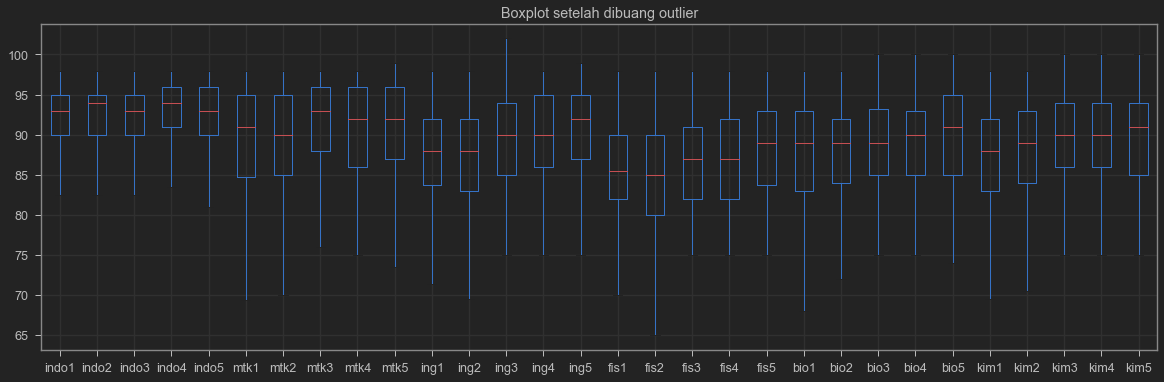

In [12]:
plt.figure(figsize=(20,6))
data.iloc[:, :-1].boxplot()
plt.title('Boxplot setelah dibuang outlier')
plt.show()

In [13]:
print('nilai minimum \n', data.iloc[:,1:-1].min(), '\n nilai maksimum \n', data.iloc[:,1:-1].max())

nilai minimum 
 indo1    82.500
indo2    82.500
indo3    82.500
indo4    83.500
indo5    81.000
mtk1     69.375
mtk2     70.000
mtk3     76.000
mtk4     75.000
mtk5     73.500
ing1     71.375
ing2     69.500
ing3     75.000
ing4     75.000
ing5     75.000
fis1     70.000
fis2     65.000
fis3     75.000
fis4     75.000
fis5     75.000
bio1     68.000
bio2     72.000
bio3     75.000
bio4     75.000
bio5     74.000
kim1     69.500
kim2     70.500
kim3     75.000
kim4     75.000
kim5     75.000
dtype: float64 
 nilai maksimum 
 indo1     98.0
indo2     98.0
indo3     98.0
indo4     98.0
indo5     98.0
mtk1      98.0
mtk2      98.0
mtk3      98.0
mtk4      98.0
mtk5      99.0
ing1      98.0
ing2      98.0
ing3     102.0
ing4      98.0
ing5      99.0
fis1      98.0
fis2      98.0
fis3      98.0
fis4      98.0
fis5      98.0
bio1      98.0
bio2      98.0
bio3     100.0
bio4     100.0
bio5     100.0
kim1      98.0
kim2      98.0
kim3     100.0
kim4     100.0
kim5     100.0
dtype: float64


In [16]:
data = data[data['ing3']<=100]
data.max()

nama     Zufar Alfaruqi
indo1              98.0
indo2              98.0
indo3              98.0
indo4              98.0
indo5              98.0
mtk1               98.0
mtk2               98.0
mtk3               98.0
mtk4               98.0
mtk5               99.0
ing1               98.0
ing2               98.0
ing3               99.0
ing4               98.0
ing5               99.0
fis1               98.0
fis2               98.0
fis3               98.0
fis4               98.0
fis5               98.0
bio1               98.0
bio2               98.0
bio3              100.0
bio4              100.0
bio5              100.0
kim1               98.0
kim2               98.0
kim3              100.0
kim4              100.0
kim5              100.0
lulus                 1
dtype: object

<ipython-input-17-d2ff87e4efe5>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


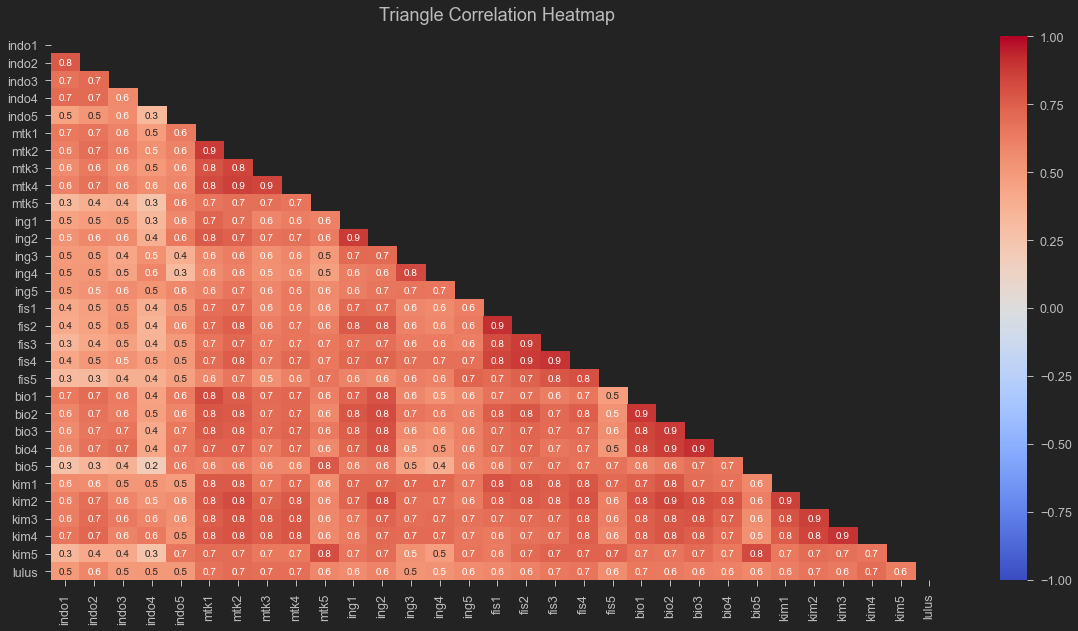

In [17]:
plt.figure(figsize= (20,10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt='.1f', annot_kws={"size": 10}, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

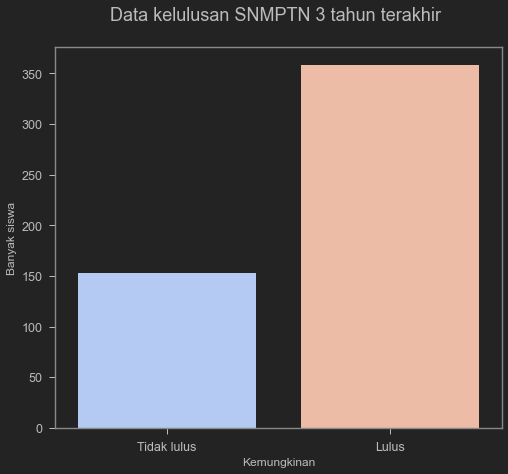

In [18]:
sns.countplot(x= data['lulus'], palette= 'coolwarm')
plt.title('Data kelulusan SNMPTN 3 tahun terakhir \n', fontsize=  18)
plt.xticks(np.arange(0,2), ('Tidak lulus', 'Lulus'))
plt.xlabel('Kemungkinan', fontsize= 12)
plt.ylabel('Banyak siswa',fontsize= 12)
plt.show()

Creating only admitted students data

In [19]:
lulus = data[data['lulus'] == 1]

In [20]:
indo = lulus.iloc[:, 1:6].mean()
mat = lulus.iloc[:, 6:11].mean()
ing = lulus.iloc[:, 11:16].mean()
fis = lulus.iloc[:, 16:21].mean()
bio = lulus.iloc[:, 21:26].mean()
kim = lulus.iloc[:, 26:31].mean()

Plotting admitted students score

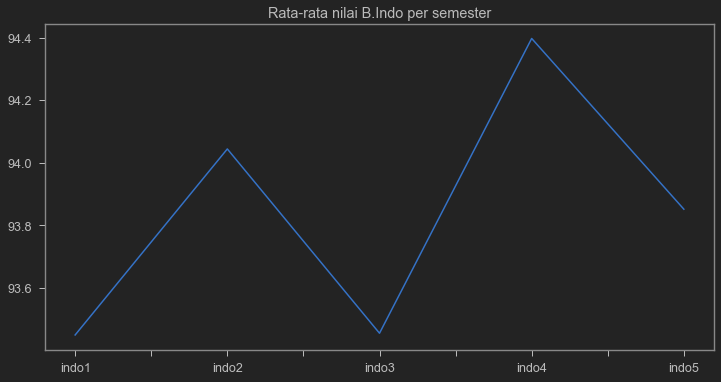

In [22]:
plt.figure(figsize=(12,6))
indo.plot()
plt.title('Rata-rata nilai B.Indo per semester')
plt.savefig('b.indo.jpeg')
plt.show()

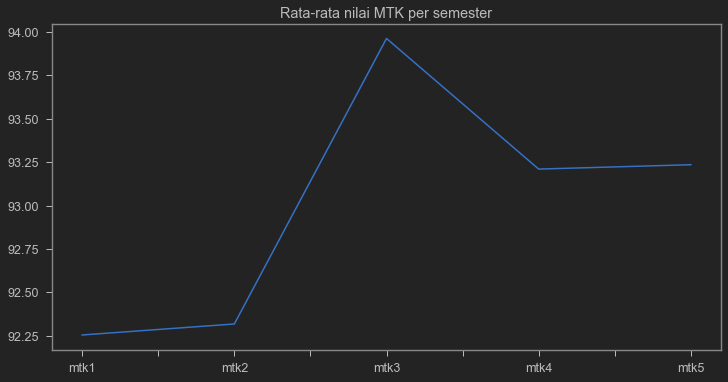

In [23]:
plt.figure(figsize=(12,6))
mat.plot()
plt.title('Rata-rata nilai MTK per semester')
plt.savefig('mtk.jpeg')
plt.show()

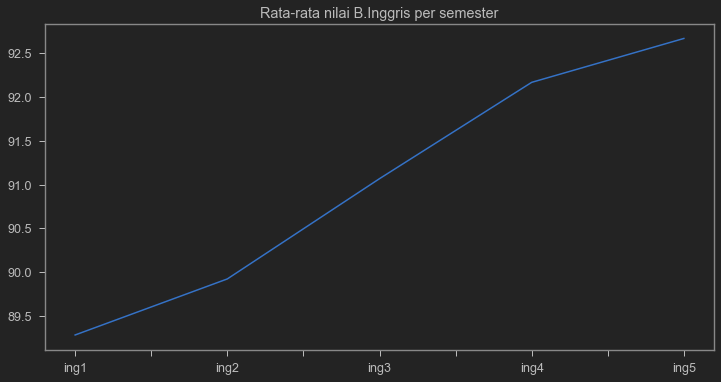

In [24]:
plt.figure(figsize=(12,6))
ing.plot()
plt.title('Rata-rata nilai B.Inggris per semester')
plt.savefig('b.ing.jpeg')
plt.show()

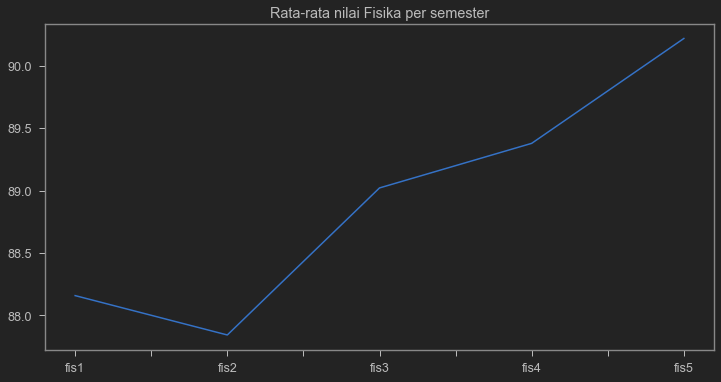

In [25]:
plt.figure(figsize=(12,6))
fis.plot()
plt.title('Rata-rata nilai Fisika per semester')
plt.savefig('fis.jpeg')
plt.show()

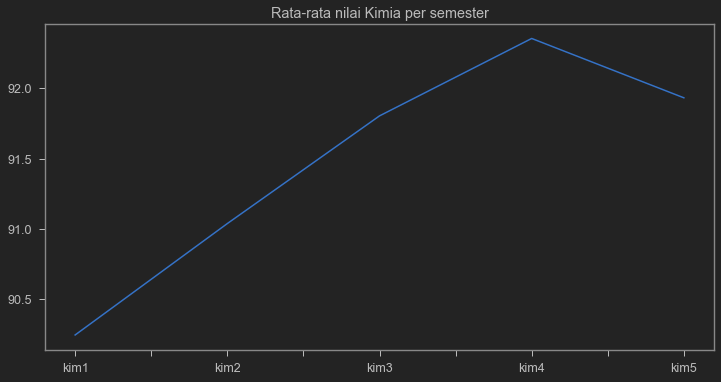

In [26]:
plt.figure(figsize=(12,6))
kim.plot()
plt.title('Rata-rata nilai Kimia per semester')
plt.savefig('kim.jpeg')
plt.show()

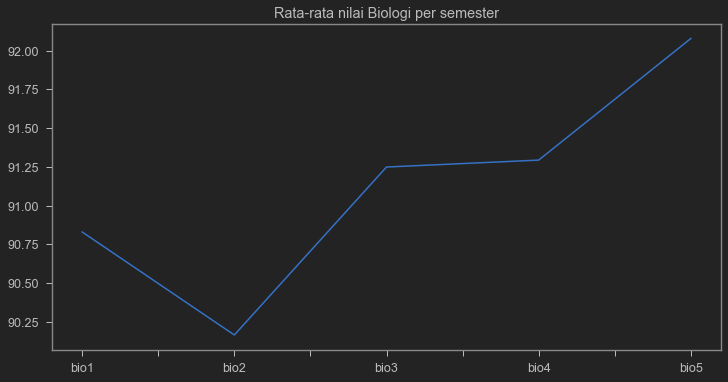

In [27]:
plt.figure(figsize=(12,6))
bio.plot()
plt.title('Rata-rata nilai Biologi per semester')
plt.savefig('bio.jpeg')
plt.show()

In [32]:
x = data.drop(['nama', 'lulus'], axis=1)
y = data['lulus']

In [33]:
x

,indo1,indo2,indo3,indo4,indo5,mtk1,mtk2,mtk3,mtk4,mtk5,...,bio1,bio2,bio3,bio4,bio5,kim1,kim2,kim3,kim4,kim5
0,98.0,98.0,98.0,98.0,96.0,98.0,98.0,98.0,98.0,97.0,...,98.0,98.0,98.0,98.0,98.0,98.0,98.0,100.0,100.0,100.0
1,98.0,98.0,98.0,98.0,96.0,98.0,98.0,98.0,98.0,98.0,...,98.0,98.0,100.0,100.0,100.0,98.0,98.0,98.0,98.0,95.0
2,98.0,98.0,98.0,98.0,96.0,98.0,98.0,98.0,98.0,97.0,...,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0
3,98.0,98.0,98.0,98.0,96.0,98.0,98.0,98.0,98.0,97.0,...,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0
4,95.0,95.0,96.0,94.0,96.0,95.0,95.0,96.0,96.0,99.0,...,92.0,89.0,95.0,94.0,94.0,92.0,92.0,93.0,95.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,89.0,89.0,91.0,94.0,94.0,89.0,89.0,89.0,89.0,93.0,...,89.0,92.0,93.0,92.0,92.0,89.0,89.0,89.0,90.0,88.0
507,83.0,83.0,83.0,84.0,97.0,83.0,83.0,83.0,83.0,83.0,...,83.0,83.0,83.0,83.0,87.0,83.0,83.0,83.0,83.0,86.0
508,82.5,82.5,82.5,83.5,93.0,75.0,75.0,78.0,75.0,81.0,...,78.0,80.0,80.0,82.0,88.0,75.0,75.0,75.0,75.0,86.0
509,82.5,82.5,82.5,83.5,81.0,75.0,75.0,76.0,76.0,98.0,...,82.0,83.0,80.0,84.0,85.0,75.0,75.0,75.0,75.0,83.0


In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
506    1
507    0
508    0
509    0
510    0
Name: lulus, Length: 511, dtype: int64

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [36]:
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

### Model Training

Logistic Regression

In [37]:
regressor = LogisticRegression()

In [38]:
regressor.fit(x_train, y_train)

LogisticRegression()

In [39]:
reg_train_pred = regressor.predict(x_train)

In [40]:
print('training model accuracy: ', accuracy_score(y_train, reg_train_pred))

training model accuracy:  0.9485294117647058


In [41]:
reg_test_pred = regressor.predict(x_test)

In [42]:
print('test model accuracy: ', accuracy_score(y_test, reg_test_pred))

test model accuracy:  0.9029126213592233


Random Forests

In [43]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
rf_train_pred = rf.predict(x_train)
print('Training model accuracy:', accuracy_score(y_train, rf_train_pred))

Training model accuracy: 1.0


In [45]:
rf_test_pred = rf.predict(x_test)
print('Test model accuracy:', accuracy_score(y_test, rf_test_pred))

Test model accuracy: 0.912621359223301


XGB

In [46]:
xb = XGBRFClassifier()
xb.fit(x_train, y_train)

[07:14:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\62812\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=12, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [47]:
xb_train_pred = xb.predict(x_train)
print('Training model accuracy:', accuracy_score(y_train, xb_train_pred))

Training model accuracy: 0.9656862745098039


In [48]:
xb_test_pred = xb.predict(x_test)
print('Test model accuracy:', accuracy_score(y_test, xb_test_pred))

Test model accuracy: 0.9223300970873787


SVC

In [49]:
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [50]:
sv_train_pred = sv.predict(x_train)
print('Training model accuracy:', accuracy_score(y_train, sv_train_pred))

Training model accuracy: 0.9607843137254902


In [51]:
sv_test_pred = sv.predict(x_test)
print('Test model accuracy:', accuracy_score(y_test, sv_test_pred))

Test model accuracy: 0.912621359223301


model testing (using support vector)

In [56]:
test_data = pd.read_excel('tes.xlsx')

In [57]:
test_data['lulus'] = sv.predict(scaler.transform(test_data.iloc[:, :-1]))

In [58]:
test_data.head()

,indo1,indo2,indo3,indo4,indo5,mtk1,mtk2,mtk3,mtk4,mtk5,...,bio2,bio3,bio4,bio5,kim1,kim2,kim3,kim4,kim5,lulus
0,93,93,94,89,93,88,93,95,86,93,...,94,89,88,93,86,85,93,88,88,1
1,92,89,94,94,88,85,88,92,94,92,...,85,87,88,93,88,85,85,95,91,1
2,90,90,86,92,94,89,86,88,90,85,...,89,90,90,86,87,87,95,91,88,1
3,88,93,91,90,86,90,86,93,89,90,...,89,87,89,94,89,92,90,95,90,1
4,85,91,90,92,89,92,87,90,92,86,...,91,91,94,88,91,89,94,89,92,1


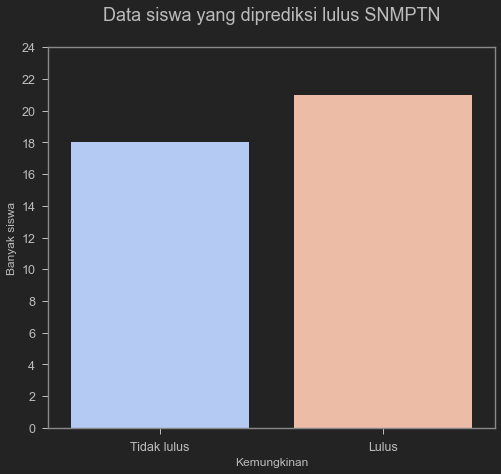

In [60]:
sns.countplot(x= test_data['lulus'], palette= 'coolwarm')
plt.title('Data siswa yang diprediksi lulus SNMPTN\n', fontsize=  18)
plt.xticks(np.arange(0,2), ('Tidak lulus', 'Lulus'))
plt.xlabel('Kemungkinan', fontsize= 12)
plt.yticks(np.arange(0,25, step= 2))
plt.ylabel('Banyak siswa',fontsize= 12)
plt.show()